## Machine learning-based prediction of COVID-19 diagnosis based on symptoms

- The COVID-19 pandemic caused by the SARS-CoV-2 virus continues to pose a significant threat to global health, with more than 39.5 million confirmed cases and 1.1 million deaths reported worldwide as of October 2020. The outbreak, which began in December 2019 in China, has overwhelmed healthcare systems worldwide, resulting in shortages of medical equipment and personnel. The shortage of the most validated diagnosis test, reverse transcriptase polymerase chain reaction (RT-PCR), has contributed to increased infection rates and delayed preventive measures. To address this issue, prediction models have been developed to assist medical staff in triaging patients for COVID-19. However, most of these models are based on data from hospitalized patients and are not effective in screening the general population. In this context, we propose a machine-learning model that predicts a positive SARS-CoV-2 infection in an RT-PCR test by asking eight basic questions. The model was trained on data from individuals in ABC place who were tested for SARS-CoV-2 during the first months of the pandemic.

### Overview

- The effective screening of SARS-CoV-2 plays a vital role in the quick and efficient diagnosis of COVID-19, and it can significantly reduce the burden on healthcare systems. To assist medical staff in triaging patients, especially in the context of limited healthcare resources, prediction models have been developed that combine several features to estimate the risk of infection. In this regard, a machine-learning approach was established that trained on records from 67,584 tested individuals, of whom 4,747 were confirmed to have COVID-19. The test set contained data from the subsequent week, where 51,810 tested individuals were reported, of whom 4,760 were confirmed to have COVID-19. Using only eight binary features, such as sex, age ≥60 years, known contact with an infected individual, and the appearance of five initial clinical symptoms, The model was developed based on the data reported by the 'ABC' government, making it a practical tool to detect COVID-19 cases through simple features accessed by asking basic questions.

### Data Preprocessing

In [329]:
# importing necessasry liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [330]:
#reading the dataset
df = pd.read_csv("corona_tested_006 (1).csv")

In [331]:
# checking the first few rows
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [332]:
# checking the dimensions of the data
df.shape

(278848, 11)

In [333]:
# checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [334]:
# basic exploration
print("\nCategories in 'Cough_symptoms' variable: ")
print(df['Cough_symptoms'].value_counts())

print("\nCategories in 'Fever' variable: ")
print(df['Fever'].value_counts())

print("\nCategories in 'Sore_throat' variable: ")
print(df['Sore_throat'].value_counts())

print("\nCategories in 'Shortness_of_breath' variable: ")
print(df['Shortness_of_breath'].value_counts())

print("\nCategories in 'Headache' variable: ")
print(df['Headache'].value_counts())

print("\nCategories in 'Corona' variable: ")
print(df['Corona'].value_counts())

print("\nCategories in 'Age_60_above' variable: ")
print(df['Age_60_above'].value_counts())

print("\nCategories in 'Sex' variable: ")
print(df['Sex'].value_counts())

print("\nCategories in 'Known_contact' variable: ")
print(df['Known_contact'].value_counts())


Categories in 'Cough_symptoms' variable: 
False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

Categories in 'Fever' variable: 
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

Categories in 'Sore_throat' variable: 
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

Categories in 'Shortness_of_breath' variable: 
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

Categories in 'Headache' variable: 
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

Categories in 'Corona' variable: 
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

Categories in 'Age_60_above' variable: 
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int6

In [335]:
# renaming the necessary columns
df = df.rename(columns={'Cough_symptoms': 'Cough'})

- Upon primary inspection of the given dataset, we can observe that our dataset is slightly uneven and inconsistent.
- To name a few anomalies, the symptoms generally should have binary outcome viz."True" or "False", but in the given dataset the case of the same binary outcome is not consistent throughout, which in turn causes the program to misjudge the oboviously two visible binary outcomes as more than two categories, for example: TRUE, True, FALSE, False.

### Missing values and visualization analysis

In [336]:
df.isna().sum()

Ind_ID                 0
Test_date              0
Cough                  0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

- from the elementary inspection, we can observed that there are certain null values in the dataset.
- moreover this not detected by isna() function.

In [337]:
# Hence we make our data consistent in the following format.
df['Cough'] = df['Cough'].replace({'FALSE': 'false', 'TRUE': 'true', 'none': None})
df['Cough'] = df['Cough'].replace({'false': False, 'true': True})

df['Fever'] = df['Fever'].replace({'FALSE': 'false', 'TRUE': 'true', 'none': None})
df['Fever'] = df['Fever'].replace({'false': False, 'true': True})

df['Sore_throat'] = df['Sore_throat'].replace({'FALSE': 'false', 'TRUE': 'true', 'none': None})
df['Sore_throat'] = df['Sore_throat'].replace({'false': False, 'true': True})

df['Shortness_of_breath'] = df['Shortness_of_breath'].replace({'FALSE': 'false', 'TRUE': 'true', 'none': None})
df['Shortness_of_breath'] = df['Shortness_of_breath'].replace({'false': False, 'true': True})

df['Headache'] = df['Headache'].replace({'FALSE': 'false', 'TRUE': 'true', 'none': None})
df['Headache'] = df['Headache'].replace({'false': False, 'true': True})

df['Sex'] = df['Sex'].replace({'female': 'false', 'male': 'true', 'none': None})
df['Sex'] = df['Sex'].replace({'false': False, 'true': True})

In [338]:
data=df.copy()
data1=df.copy()
data.head()

,Ind_ID,Test_date,Cough,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,None,None,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,None,None,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,None,None,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,None,None,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,None,None,Contact with confirmed


### Plotting the distribution of the plot

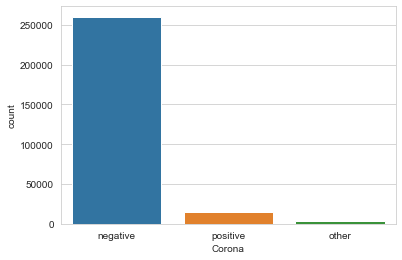

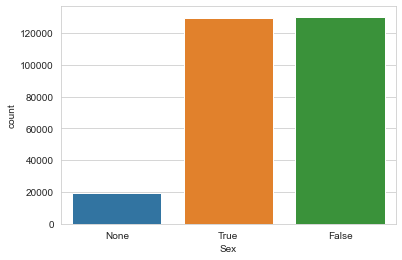

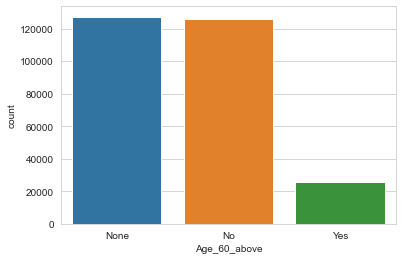

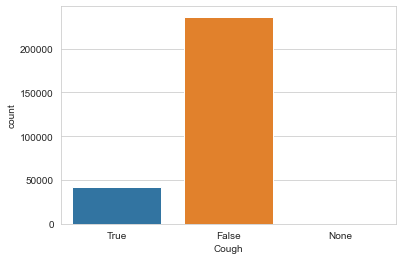

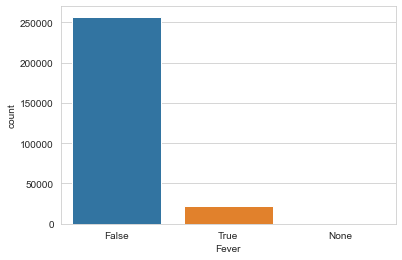

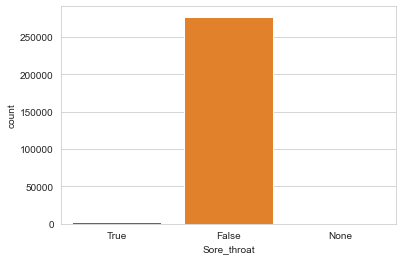

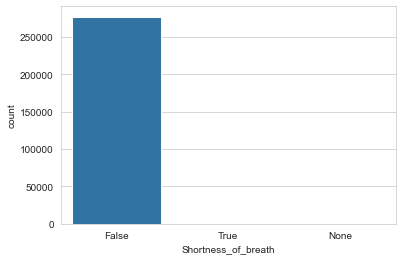

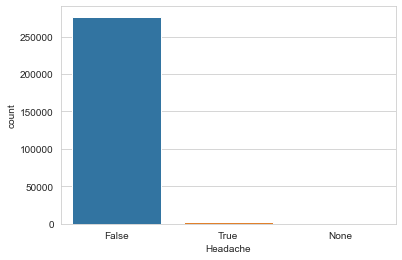

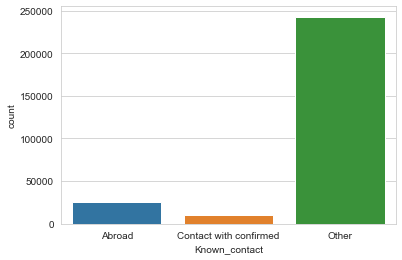

In [339]:
# count plot of Covid report
sns.countplot(x='Corona', data=df)
plt.show()

# count plot of Sex
sns.countplot(x='Sex', data=df)
plt.show()

# count plot of Age
sns.countplot(x='Age_60_above', data=df)
plt.show()

# count plot of other categorical variables
sns.countplot(x='Cough', data=df)
plt.show()

sns.countplot(x='Fever', data=df)
plt.show()

sns.countplot(x='Sore_throat', data=df)
plt.show()

sns.countplot(x='Shortness_of_breath', data=df)
plt.show()

sns.countplot(x='Headache', data=df)
plt.show()

sns.countplot(x='Known_contact', data=df)
plt.show()

- As we see our data is quite unsymetrical and imbalanced, in the sense, negative cases are drastically high as compare to positive cases.
- As we can see that negative caases are quite high this highlights most of the symptoms in the surveyed individual are at low intensity.
- Also under the age parameter most of the observations are below age 60.
- Also one of the most important observation from the dataset most of the people surveyed have unkown origin of contact.

In [340]:
data = data.replace(to_replace="None", value=float('nan')) # converting into NaN values

In [341]:
data.head()

,Ind_ID,Test_date,Cough,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [342]:
missing_value_sum = data.isnull().sum()
print(missing_value_sum)
missing_value_percentage = data.isnull().mean()*100
print(missing_value_percentage)

Ind_ID                      0
Test_date                   0
Cough                     252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64
Ind_ID                  0.000000
Test_date               0.000000
Cough                   0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  0.000000
Age_60_above           45.659284
Sex                     7.015650
Known_contact           0.000000
dtype: float64


- under the age parameter, it is observed that almost half of the datapoints are not specific regarding the age or they are missing.
- we can see that the variables "Age_60_above" and "Sex" have a relatively high percentage of missing values, with 45.66% and 7.02%, respectively.
- It is also important to note that "Cough" and "Fever" have the same number of missing values, indicating a possible relationship between the two variables.

In [343]:
import missingno as msno # importing missingno liabrary

<AxesSubplot:>

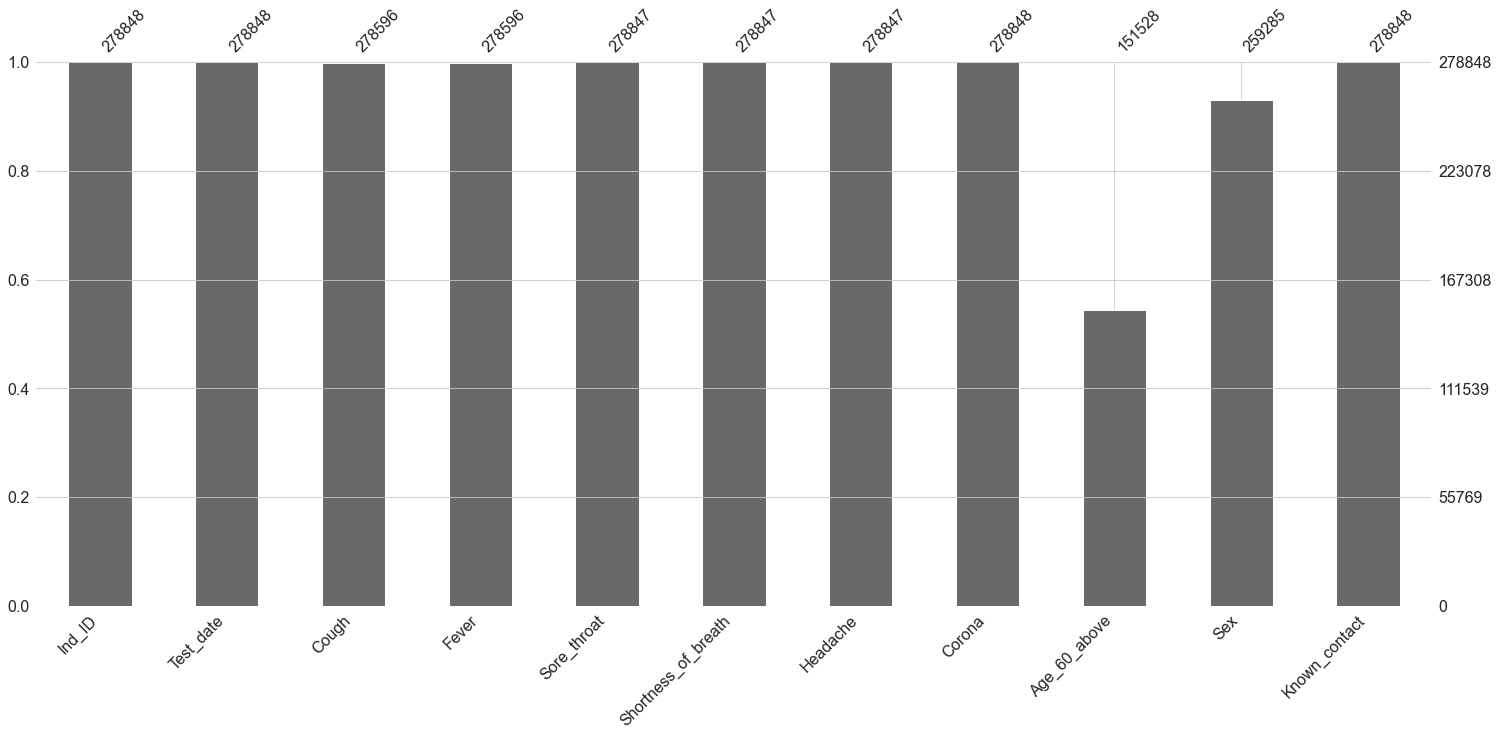

In [344]:
msno.bar(data)

- There are missing values in multiple colums 
- age_60_above have almost half of the observation are missing 
- cough,fever,sore_throat,shortness_of_breath,headache have low amount missing values 
- sex column have 7 percent of data is missing.

<AxesSubplot:>

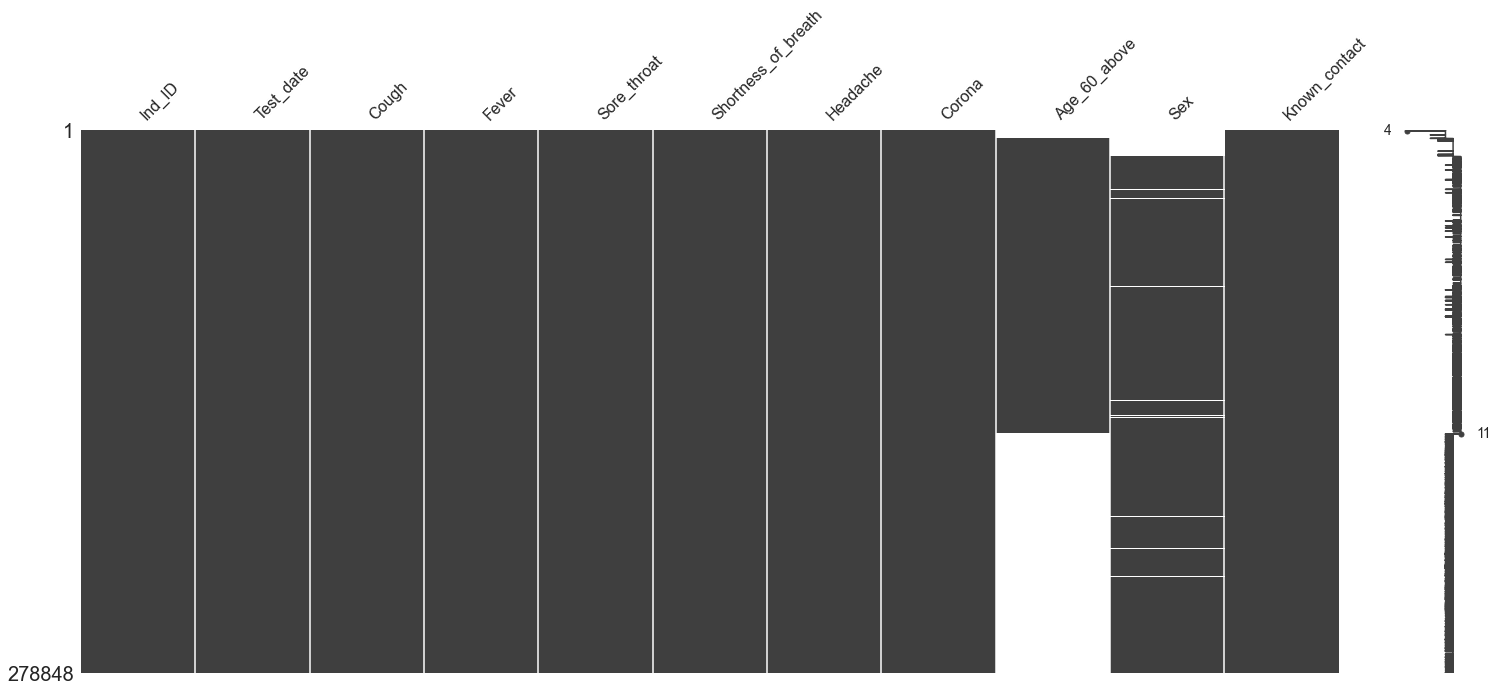

In [345]:
msno.matrix(data)

- It seems that the missing data in the "Age_60_above" feature is not random but rather systematic, with a clear pattern of missing values in certain segments of the data. 
- Similarly, the missing data in the "Sex" feature also seems to follow a pattern, with thin lines of missing values at random intervals.

<AxesSubplot:>

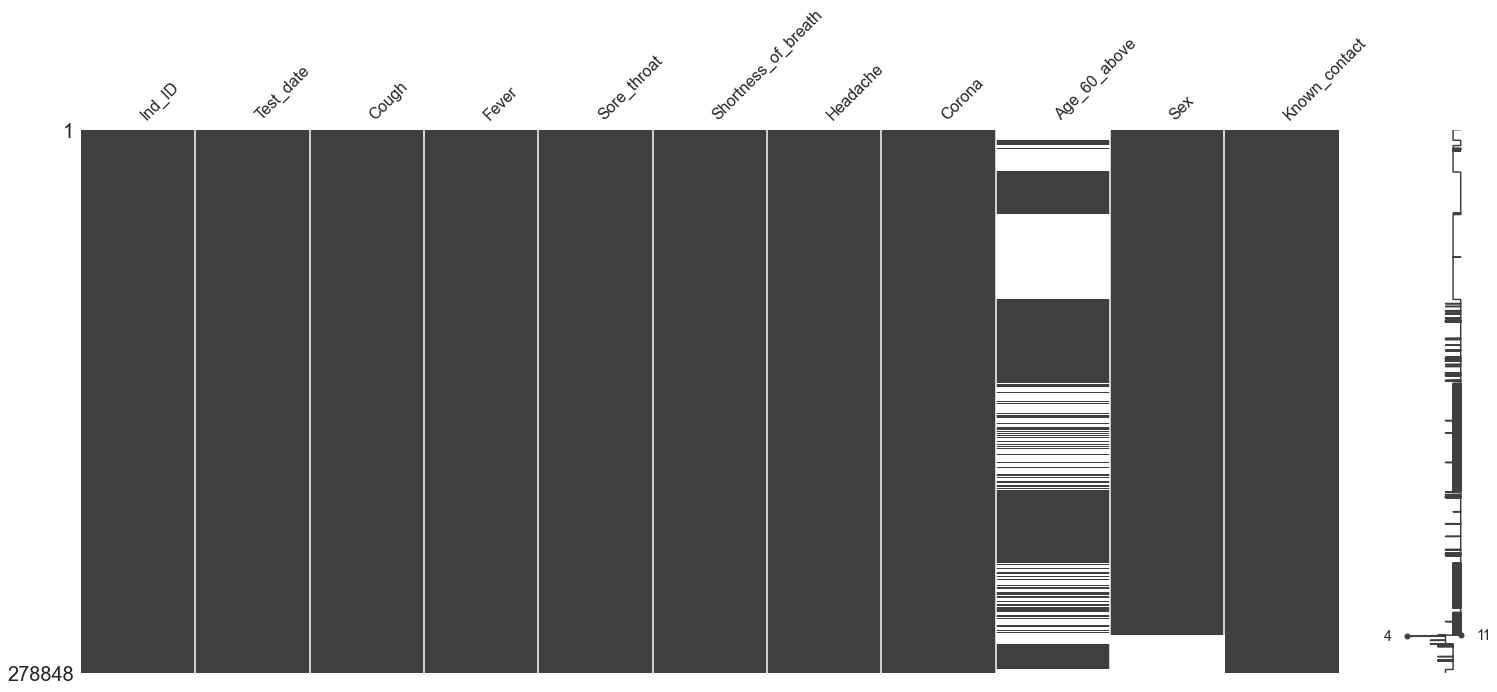

In [346]:
sorted = data.sort_values("Sex")
msno.matrix(sorted)

In [347]:
#relation = data.loc[(data["Corona"] == "negative")]
#relation

<AxesSubplot:>

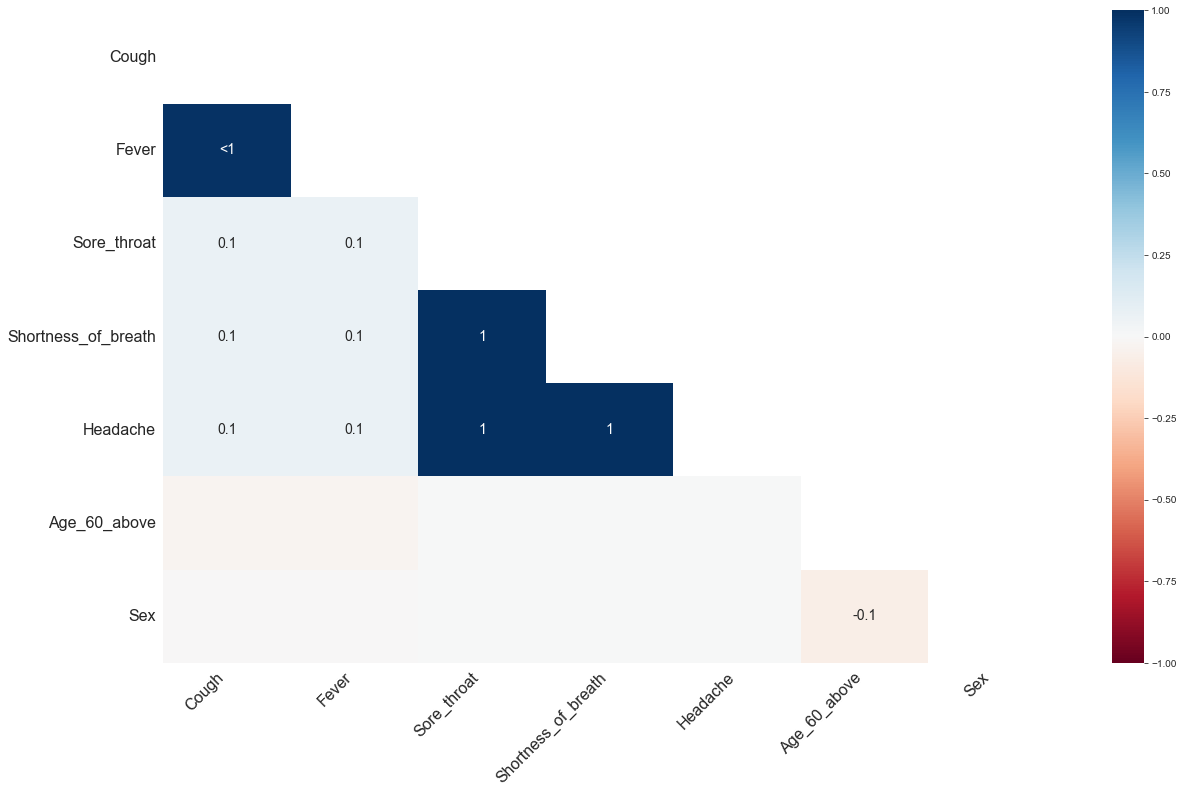

In [348]:
msno.heatmap(data)

- A correlation value of 1 signifies a perfect positive correlation for shortness of breath, headache, and sore throat. It suggests that if one of these features are missing, the other two features are also always missing. This could indicate that these symptoms are often reported together.
- The correlation values of 0.1 between cough, fever, and the other features suggest a weaker relationship, indicating that if one of these features is missing, it is slightly more likely for the other features to be missing as well, but not always.
- The weaker negative correlation value -0.1 between sex and Age_60_above suggests that if one of these features is missing, the other feature is less likely to be missing, meaning they are not missing together much frequently.

### Missing value analysis Summary

#### Based on the the missing values analysis summary can be as follows:

- Age parameter has a high percentage of missing values. This indicates that almost half of the data points are not specific regarding the age or are missing.
- From matrix1 chart we observe that the missing data in the "Age_60_above" feature is not random but rather systematic, with a clear pattern of missing values in certain segments of the data. Similarly, the missing data in the "Sex" feature also seems to follow a pattern, with thin lines of missing values at random intervals.
- From matrix2 chart and heatmap, they have some relation between them but it is weak and negative(-0.1) and it also suggests that if one of these features is missing, the other feature is very less likely to be missing, meaning they are not missing together frequently. This missingness may be "Missing At Random(MAR)". 



### Handling the missing values with justification through visualization

In [349]:
corona_other = df[df['Corona'] == 'other']
corona_other.head(3)

,Ind_ID,Test_date,Cough,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
5,6,11-03-2020,True,False,False,False,False,other,None,None,Contact with confirmed
29,30,11-03-2020,True,False,False,False,False,other,None,None,Abroad
55,56,11-03-2020,True,True,True,False,False,other,None,None,Other


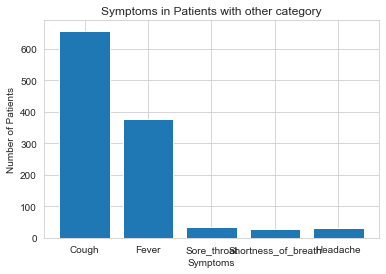

In [350]:
symptoms = ['Cough', "Fever",'Sore_throat', 'Shortness_of_breath', 'Headache']
counts = [corona_other[symptom].value_counts()[True] for symptom in symptoms]
plt.bar(symptoms, counts)
plt.title('Symptoms in Patients with other category')
plt.xlabel('Symptoms')
plt.ylabel('Number of Patients')
plt.show()

- While inspecting the given dataset, it is primarly  observed that under the corona test column, there are three categories viz: positive, negative and other.
- Now the "other" category, which possibly signifies that the individual is neither positive nor negative for covid19 disease and this strongly highlights that the individual has another disease which is not covid 19.
- Regarding the symptoms, the another unkown disease can be assumed to have similar symptoms to covid 19, hence we eliminate the "other" category from the outcome variable

In [351]:
# converting them into 
data['Corona'] = data['Corona'].replace({'negative': 'false', 'positive': 'true'})
data['Corona'] = data['Corona'].replace({'false': False, 'true': True})         

In [352]:
# removing the Corona category other
data = data[data['Corona'] != 'other']
data1 = data1[data1['Corona'] != 'other']

<AxesSubplot:xlabel='Age_60_above', ylabel='count'>

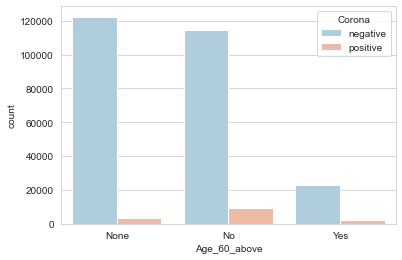

In [353]:
sns.set_style("whitegrid")
sns.countplot(x="Age_60_above", hue="Corona",data=data1,palette='RdBu_r')

<AxesSubplot:xlabel='Corona', ylabel='count'>

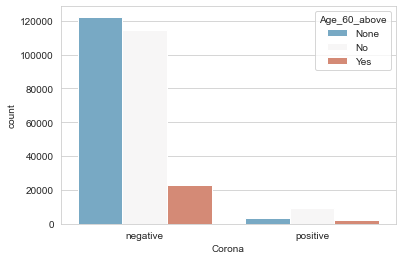

In [354]:
sns.set_style("whitegrid")
sns.countplot(x="Corona", hue="Age_60_above",data=data1,palette='RdBu_r')

-  Upon initial inspection of the dataset, it was observed that the age_60_above column had a large number of missing values, with almost half of the observations missing. The visualization plot revealed that the missing values were mostly inclined towards negative cases.

- As the dataset was unsymmetrical and imbalanced, imputing the missing values based on symptoms alone was not a viable option. Furthermore, there were no other features related to age, such as chronic health conditions like hypertension, diabetes, or heart disease, education level, or employment status available in the dataset for imputation purposes.

- Given these limitations, removing the missing values was considered the best option. The sample size of the remaining observations was still sufficient, which justifies the action of eliminating the missing values.

In [355]:
data['Age_60_above'] = data['Age_60_above'].replace({'No': 'false', 'Yes': 'true'})
data['Age_60_above'] = data['Age_60_above'].replace({'false': False, 'true': True})

In [356]:
#sns.set_style("whitegrid")
#sns.countplot(x="Corona", hue="Known_contact",data=data,palette='RdBu_r')

In [357]:
#data = data[data['Known_contact'] != 'Abroad']
#data1 = data1[data1['Known_contact'] != 'Abroad']

In [358]:
data = data.dropna(axis=0)

In [359]:
data.head()

,Ind_ID,Test_date,Cough,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,False,False,False,False,False,False,True,Abroad
13728,13729,22-03-2020,True,False,False,False,False,False,False,False,Abroad
13730,13731,22-03-2020,True,True,False,False,False,True,True,False,Other
13734,13735,22-03-2020,False,False,False,False,False,False,False,True,Other
13735,13736,22-03-2020,False,False,False,False,False,False,False,False,Other


In [360]:
data.shape

(136294, 11)

In [361]:
import numpy as np

# Convert columns to binary
data['Cough'] = np.array(data['Cough'], dtype=int)
data['Fever'] = np.array(data['Fever'], dtype=int)
data['Sore_throat'] = np.array(data['Sore_throat'], dtype=int)
data['Shortness_of_breath'] = np.array(data['Shortness_of_breath'], dtype=int)
data['Headache'] = np.array(data['Headache'], dtype=int)
data['Age_60_above'] = np.array(data['Age_60_above'], dtype=int)
data['Sex'] = np.array(data['Sex'], dtype=int)
data['Corona'] = np.array(data['Corona'], dtype=int)


# Verify the conversion
print(data.head())

       Ind_ID   Test_date  Cough  Fever  Sore_throat  Shortness_of_breath  \
13727   13728  22-03-2020      1      0            0                    0   
13728   13729  22-03-2020      1      0            0                    0   
13730   13731  22-03-2020      1      1            0                    0   
13734   13735  22-03-2020      0      0            0                    0   
13735   13736  22-03-2020      0      0            0                    0   

       Headache  Corona  Age_60_above  Sex Known_contact  
13727         0       0             0    1        Abroad  
13728         0       0             0    0        Abroad  
13730         0       1             1    0         Other  
13734         0       0             0    1         Other  
13735         0       0             0    0         Other  


In [362]:
# Perform one-hot encoding on 'known_contact' variable
data = pd.get_dummies(data, columns=['Known_contact'], prefix='known_contact')

### splitting the Dataset into Training , validation and Test sets

In [363]:
from sklearn.model_selection import train_test_split
# split the data into train, validation, and test sets
train_val_df = data[data['Test_date'] < '2020-04-16']
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)
test_df = data[data['Test_date'] >= '2020-04-16']

In [364]:
print(train_val_df.shape)

print(train_df.shape)

print(val_df.shape)

print(test_df.shape)

(84480, 13)
(67584, 13)
(16896, 13)
(51814, 13)


In [365]:
train_val_df = train_val_df.drop(['Ind_ID', 'Test_date'], axis=1)
train_df = train_df.drop(['Ind_ID', 'Test_date'], axis=1)
val_df = val_df.drop(['Ind_ID', 'Test_date'], axis=1)
test_df = test_df.drop(['Ind_ID', 'Test_date'], axis=1)

In [366]:
train_df.head(3)

,Cough,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,known_contact_Abroad,known_contact_Contact with confirmed,known_contact_Other
124884,1,0,0,0,0,0,0,1,0,1,0
105431,0,0,0,0,0,0,1,1,0,0,1
128778,1,0,0,0,0,0,0,0,1,0,0


In [367]:
val_df.head(3)

,Cough,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,known_contact_Abroad,known_contact_Contact with confirmed,known_contact_Other
131586,1,1,0,0,0,0,1,1,1,0,0
118892,0,0,0,0,0,1,0,1,1,0,0
101990,0,0,0,0,0,0,1,0,0,0,1


In [368]:
test_df.head(3)

,Cough,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,known_contact_Abroad,known_contact_Contact with confirmed,known_contact_Other
13727,1,0,0,0,0,0,0,1,1,0,0
13728,1,0,0,0,0,0,0,0,1,0,0
13730,1,1,0,0,0,1,1,0,0,0,1


In [369]:
# Independent variables
X = train_df.drop(["Corona"], axis=1)

# Dependent variable
y = train_df.Corona

### Feature selection

In [370]:
# importing necessary liabraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [371]:
# Technique 1: Random Forest
# Create a random forest classifier
model = RandomForestClassifier(n_estimators=100)
# Fit the model and get the feature importance scores
model.fit(X, y)
feature_importance = model.feature_importances_
# Select the top 5 features based on their importance scores
selected_features_rf = X.columns[feature_importance.argsort()[-5:]]

In [372]:
print("Selected features using Random Forest:", selected_features_rf)

Selected features using Random Forest: Index(['Fever', 'known_contact_Other', 'Sore_throat', 'Headache',
       'known_contact_Contact with confirmed'],
      dtype='object')


In [373]:
# Technique 2: Recursive Feature Elimination (RFE)
# Create a logistic regression model
model = LogisticRegression()
# Select the top 5 features using RFE
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

# Get the names of the selected features
selected_features_rfe = X.columns[rfe.get_support()]

In [374]:
print("Selected features using RFE:", selected_features_rfe)

Selected features using RFE: Index(['Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache',
       'known_contact_Contact with confirmed'],
      dtype='object')


In [375]:
# Technique 3: Mutual information
# Select the top 5 features using mutual information
kbest = SelectKBest(mutual_info_classif, k=5)
X_mi = kbest.fit_transform(X, y)

# Get the names of the selected features
selected_features_mi = X.columns[kbest.get_support()]

In [376]:
print("Selected features using mutual information:", selected_features_mi)

Selected features using mutual information: Index(['Fever', 'Sore_throat', 'Headache',
       'known_contact_Contact with confirmed', 'known_contact_Other'],
      dtype='object')


In [377]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif



# instantiate the SelectKBest class
k_best = SelectKBest(score_func=f_classif, k=5)

# fit the feature selector to the data
k_best.fit(X, y)

# get the indices of the top k features
top_k_indices = k_best.get_support(indices=True)

# get the feature names
top_k_features = [X.columns[i] for i in top_k_indices]

In [378]:
top_k_features

['Fever',
 'Sore_throat',
 'Headache',
 'known_contact_Contact with confirmed',
 'known_contact_Other']

In [195]:
# Technique 1: Random Forest
predictors = ['known_contact_Other', 'known_contact_Abroad', 'Sore_throat',
       'Headache', 'known_contact_Contact with confirmed']
target = 'Corona'

In [381]:
# Technique 2: Recursive Feature Elimination (RFE)
predictors = ['Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache',
       'known_contact_Contact with confirmed']
target = 'Corona'

In [243]:
# Technique 3: Mutual information
predictors = ['Fever', 'Sore_throat', 'Headache',
       'known_contact_Contact with confirmed', 'known_contact_Other']
target = 'Corona'

In [263]:
# k_best
predictors = ['Fever',
 'Sore_throat',
 'Headache',
 'known_contact_Contact with confirmed',
 'known_contact_Other']
target = 'Corona'

In [382]:
# create X and y arrays for training, validation, and testing
X_train = train_df[predictors].values
y_train = train_df[target].values
X_val = val_df[predictors].values
y_val = val_df[target].values
X_test = test_df[predictors].values
y_test = test_df[target].values

### Building and training a machine learning model

### Random Forest

In [383]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [388]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model on the validation set
RFy_pred_val = rfc.predict(X_val)
RFval_acc = accuracy_score(y_val, RFy_pred_val)
RFval_cm = confusion_matrix(y_val, RFy_pred_val)
RFval_cr = classification_report(y_val, RFy_pred_val)

In [389]:
# Print the validation set results
print("Validation Accuracy:", RFval_acc)
print("Validation Confusion Matrix:\n", RFval_cm)
print("Validation Classification Report:\n", RFval_cr)

Validation Accuracy: 0.9555516098484849
Validation Confusion Matrix:
 [[15451   326]
 [  425   694]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     15777
           1       0.68      0.62      0.65      1119

    accuracy                           0.96     16896
   macro avg       0.83      0.80      0.81     16896
weighted avg       0.95      0.96      0.95     16896



### SVM

In [390]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [391]:
# Train an SVM model
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [392]:
# Evaluate the model on the validation set
SVMy_pred_val = svm.predict(X_val)
SVMval_acc = accuracy_score(y_val, SVMy_pred_val)
SVMval_cm = confusion_matrix(y_val, SVMy_pred_val)
SVMval_cr = classification_report(y_val, SVMy_pred_val)

In [291]:
# Print the validation set results
print("Validation Accuracy:", SVMval_acc)
print("Validation Confusion Matrix:\n", SVMval_cm)
print("Validation Classification Report:\n", SVMval_cr)

Validation Accuracy: 0.9555516098484849
Validation Confusion Matrix:
 [[15451   326]
 [  425   694]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     15777
           1       0.68      0.62      0.65      1119

    accuracy                           0.96     16896
   macro avg       0.83      0.80      0.81     16896
weighted avg       0.95      0.96      0.95     16896



In [393]:
# Evaluate the model on the test set
SVMy_pred_test = svm.predict(X_test)
SVMtest_acc = accuracy_score(y_test, SVMy_pred_test)
SVMtest_cm = confusion_matrix(y_test, SVMy_pred_test)
SVMtest_cr = classification_report(y_test, SVMy_pred_test)

In [394]:
# Print the test set results
print("Test Accuracy:", SVMtest_acc)
print("Test Confusion Matrix:\n", SVMtest_cm)
print("Test Classification Report:\n", SVMtest_cr)

Test Accuracy: 0.956112247655074
Test Confusion Matrix:
 [[46275   779]
 [ 1495  3265]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     47054
           1       0.81      0.69      0.74      4760

    accuracy                           0.96     51814
   macro avg       0.89      0.83      0.86     51814
weighted avg       0.95      0.96      0.95     51814



### KNN

In [395]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [396]:
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [397]:
# Evaluate the model on the validation set
KNNy_pred_val = knn.predict(X_val)
KNNval_acc = accuracy_score(y_val, KNNy_pred_val)
KNNval_cm = confusion_matrix(y_val, KNNy_pred_val)
KNNval_cr = classification_report(y_val, KNNy_pred_val)

In [398]:
# Print the validation set results
print("Validation Accuracy:", KNNval_acc)
print("Validation Confusion Matrix:\n", KNNval_cm)
print("Validation Classification Report:\n", KNNval_cr)

Validation Accuracy: 0.9555516098484849
Validation Confusion Matrix:
 [[15451   326]
 [  425   694]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     15777
           1       0.68      0.62      0.65      1119

    accuracy                           0.96     16896
   macro avg       0.83      0.80      0.81     16896
weighted avg       0.95      0.96      0.95     16896



### Decision Tree

In [399]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [400]:
# Train a decision tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [401]:
# Evaluate the model on the validation set
DTy_pred_val = dt.predict(X_val)
DTval_acc = accuracy_score(y_val, DTy_pred_val)
DTval_cm = confusion_matrix(y_val, DTy_pred_val)
DTval_cr = classification_report(y_val, DTy_pred_val)

In [402]:
# Print the validation set results
print("Validation Accuracy:", DTval_acc)
print("Validation Confusion Matrix:\n", DTval_cm)
print("Validation Classification Report:\n", DTval_cr)

Validation Accuracy: 0.9555516098484849
Validation Confusion Matrix:
 [[15451   326]
 [  425   694]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     15777
           1       0.68      0.62      0.65      1119

    accuracy                           0.96     16896
   macro avg       0.83      0.80      0.81     16896
weighted avg       0.95      0.96      0.95     16896



### Logistic Regression

In [403]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [404]:
# Evaluate the model on the validation set
LGy_pred_val = lg.predict(X_val)
LGval_acc = accuracy_score(y_val, LGy_pred_val)
LGval_cm = confusion_matrix(y_val, LGy_pred_val)
LGval_cr = classification_report(y_val, LGy_pred_val)

In [405]:
# Print the validation set results
print("Validation Accuracy:", LGval_acc)
print("Validation Confusion Matrix:\n", LGval_cm)
print("Validation Classification Report:\n", LGval_cr)

Validation Accuracy: 0.9526515151515151
Validation Confusion Matrix:
 [[15703    74]
 [  726   393]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     15777
           1       0.84      0.35      0.50      1119

    accuracy                           0.95     16896
   macro avg       0.90      0.67      0.74     16896
weighted avg       0.95      0.95      0.94     16896



In [309]:
#plt.figure(figsize=(10,7))
#sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
#plt.show() 

#### Model Performance till now

- So for further analysis, we are selecting Random Forest as our model with feature selection technique: Recursive Feature Elimination (RFE) with its top Five features ('Fever', 'Sore throat', 'Shortness of breath', 'Headache','known contact Contact with confirmed') 

In [406]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

### Hyperparameter tuning 

In [407]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [408]:
# Define the classifier and the hyperparameters to tune
rf_clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [409]:
# Perform hyperparameter tuning on the training set only
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [410]:
# Evaluate the best model on the validation set
best_rf_clf = grid_search.best_estimator_
y_pred_val = best_rf_clf.predict(X_val)
roc_auc_val = roc_auc_score(y_val, y_pred_val)

In [411]:
val_acc = accuracy_score(y_val, y_pred_val)
val_cm = confusion_matrix(y_val, y_pred_val)
val_cr = classification_report(y_val, y_pred_val)

In [412]:
# Print the validation set results
print("Validation Accuracy:", val_acc)
print("Validation Confusion Matrix:\n", val_cm)
print("Validation Classification Report:\n", val_cr)

Validation Accuracy: 0.9555516098484849
Validation Confusion Matrix:
 [[15451   326]
 [  425   694]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     15777
           1       0.68      0.62      0.65      1119

    accuracy                           0.96     16896
   macro avg       0.83      0.80      0.81     16896
weighted avg       0.95      0.96      0.95     16896



- we can see that even with hyperparameter tuning there is no change in the validation dataset results, anyway lets move on and see how it perform with test result

In [413]:
# Evaluate the final performance on the test set
y_pred_test = best_rf_clf.predict(X_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

In [414]:
test_acc = accuracy_score(y_test, y_pred_test)
test_cm = confusion_matrix(y_test, y_pred_test)
test_cr = classification_report(y_test, y_pred_test)

In [415]:
# Evaluate the model on the test set using the best hyperparameters
print("Test Accuracy:", test_acc)
print("Test Confusion Matrix:\n", test_cm)
print("Test Classification Report:\n", test_cr)

Test Accuracy: 0.956112247655074
Test Confusion Matrix:
 [[46275   779]
 [ 1495  3265]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     47054
           1       0.81      0.69      0.74      4760

    accuracy                           0.96     51814
   macro avg       0.89      0.83      0.86     51814
weighted avg       0.95      0.96      0.95     51814



### Test Results

- Test Accuracy: It tells us the percentage of correctly predicted instances out of all the instances in the test dataset. The given model has an accuracy of 95.61%, which is quite good.

- Test Confusion Matrix: It provides the number of true positive, true negative, false positive, and false negative predictions. From the given confusion matrix, we can see that the model has correctly predicted 46275 true negatives and 3265 true positives, but it has misclassified 779 instances of negative as positive and 1495 instances of positive as negative.

- Test Classification Report: It contains precision, recall, and f1-score metrics for each class (Negative and Positive) along with their respective support. Precision is the ratio of true positives to the total predicted positives, recall is the ratio of true positives to the total actual positives, and f1-score is the harmonic mean of precision and recall.

- From the given classification report, we can see that the model has a high precision and recall for Negative cases (97% and 98% respectively) but relatively lower precision and recall for Positive cases (81% and 69% respectively). The f1-score is a weighted average of precision and recall, which is 0.98 for Negative cases and 0.74 for Positive cases.

### Conclusion

- In conclusion, based on health data reported by the ABC Government, we developed a model for predicting COVID-19 diagnosis by asking eight basic questions.
- we can see that the model has a high accuracy and performs well in predicting negative cases. However, it has relatively lower precision and recall for positive cases, indicating that the model may have difficulty in accurately predicting positive cases. Also we tried multiple hyperparameter tuning but the results were still same.
- In my opinion, this could be due to the imbalanced nature of the dataset. From the plots, we observe that there were relatively high negative cases as compared to the Positive cases and that is why we are seeing high accuracy in the negative cases.
- we also observed that, age_60_above had significant amount of missing values and removing them may reduce the performance of the model but in my opinion there were no any other factor related to age to impute them
- we also observed that, the data provided by the ABC government had missing information such as the duration and location (indoors/outdoors) of the contact was not available. Some symptoms (such as lack of smell and taste) were identified as being very predictive of a COVID-19 infection by previous studies, but were not recorded by the ABC Government.